In [37]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#Loading the dataset
data = pd.read_csv('HospInfo.csv')
data.head(1)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"


In [39]:
#Checkimg for data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [40]:
#Checking for missing values present in the data
print('-'*8, 'Checking for missing values present in the data','-'*8)
display(data.isnull().value_counts())

#Checking for duplicates
print('-'*8, 'Checking for duplicates', '-'*8)
display(data.duplicated().value_counts())

-------- Checking for missing values present in the data --------


Provider ID  Hospital Name  Address  City   State  ZIP Code  County Name  Phone Number  Hospital Type  Hospital Ownership  Emergency Services  Meets criteria for meaningful use of EHRs  Hospital overall rating  Hospital overall rating footnote  Mortality national comparison  Mortality national comparison footnote  Safety of care national comparison  Safety of care national comparison footnote  Readmission national comparison  Readmission national comparison footnote  Patient experience national comparison  Patient experience national comparison footnote  Effectiveness of care national comparison  Effectiveness of care national comparison footnote  Timeliness of care national comparison  Timeliness of care national comparison footnote  Efficient use of medical imaging national comparison  Efficient use of medical imaging national comparison footnote  Location
False        False          False    False  False  False     False        False         False          False               False 

-------- Checking for duplicates --------


False    4812
Name: count, dtype: int64

In [41]:
#There are 4812 rows and 29 columns in the dataset.
#There are many missing values present in the columns County Name, Meets criteria for meaningful use of EHRs and every type of footnote.
#There are no duplicate values in the data.

In [42]:
print(f'The percentage of data where city and county name are same = {len(data[data['City'] == data['County Name']])/len(data)*100}')

#Replacing the City with County Name
data[data['City'] == data['County Name']]
data['County Name'] = data['County Name'].fillna(data['City'])

#Renaming the County Name column to Country Name
data.rename(columns={'County Name' : 'Country Name'}, inplace=True)

The percentage of data where city and county name are same = 11.554447215295095


In [43]:
#Checking the missing values in the 'Meets criteria for meaningful use of EHRs' Column
display(data[data['Meets criteria for meaningful use of EHRs'].isnull().values == True]['Meets criteria for meaningful use of EHRs'].head(5))
print(f'The number of missing values in the Meets criteria for meaningful use of EHRs column = {len(data[data['Meets criteria for meaningful use of EHRs'].isnull().values == True]['Meets criteria for meaningful use of EHRs'])}')

17     NaN
21     NaN
32     NaN
147    NaN
186    NaN
Name: Meets criteria for meaningful use of EHRs, dtype: object

The number of missing values in the Meets criteria for meaningful use of EHRs column = 144


In [44]:
display(data['Meets criteria for meaningful use of EHRs'].isnull().value_counts())
display(data['Meets criteria for meaningful use of EHRs'].value_counts())

Meets criteria for meaningful use of EHRs
False    4668
True      144
Name: count, dtype: int64

Meets criteria for meaningful use of EHRs
True    4668
Name: count, dtype: int64

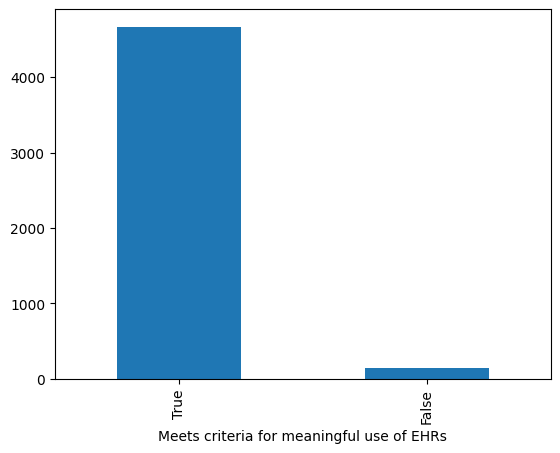

In [45]:
#In the 'Meets criteria for meaningful use of EHRs' column there are only one value present that is 'True' then the rest of all missing values will fall under 'False' Criteria
#Filling those missing values with 'False' in this column
data['Meets criteria for meaningful use of EHRs'] = data['Meets criteria for meaningful use of EHRs'].fillna('False')
data['Meets criteria for meaningful use of EHRs'].value_counts().plot(kind='bar')
plt.show()

In [46]:
display(data[data['Hospital overall rating footnote'].isnull().values == False]['Hospital overall rating footnote'])

3       There are too few measures or measure groups r...
5       There are too few measures or measure groups r...
6       This hospitals star rating only includes data...
7       There are too few measures or measure groups r...
8       There are too few measures or measure groups r...
                              ...                        
4790    There are too few measures or measure groups r...
4794    This hospitals star rating only includes data...
4799    There are too few measures or measure groups r...
4803    Results are not available for this reporting p...
4808    There are too few measures or measure groups r...
Name: Hospital overall rating footnote, Length: 1398, dtype: object

In [47]:
#Dropping the every type of footnote, ZIP Code and Location column
data.drop('Hospital overall rating footnote', axis=1, inplace=True)
data.drop('Mortality national comparison footnote', axis=1, inplace=True)
data.drop('Safety of care national comparison footnote', axis=1, inplace=True)
data.drop('Readmission national comparison footnote', axis=1, inplace=True)
data.drop('Patient experience national comparison footnote', axis=1, inplace=True)
data.drop('Effectiveness of care national comparison footnote', axis=1, inplace=True)
data.drop('Timeliness of care national comparison footnote', axis=1, inplace=True)
data.drop('Efficient use of medical imaging national comparison footnote', axis=1, inplace=True)
data.drop('ZIP Code', axis=1, inplace=True)
data.drop('Location', axis=1, inplace=True)

In [48]:
#Exporting the cleaned file to csv file for further analysis
data.to_csv('hospital_cleaned_data.csv', index=False)